### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [2]:
library(cluster)
library(ggplot2)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,de=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

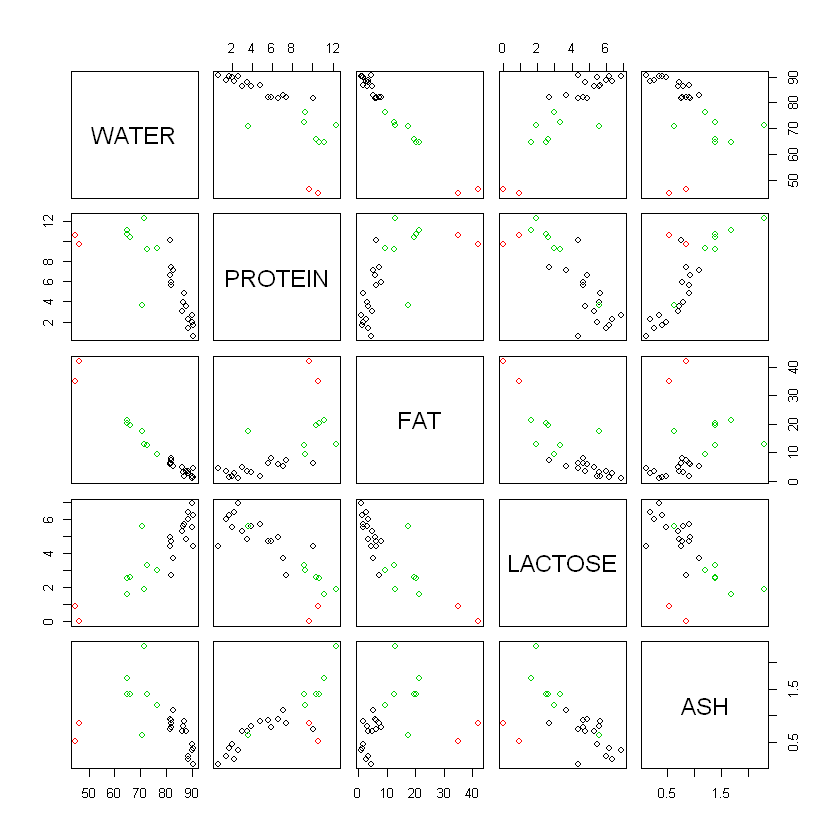

In [3]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

**Los datos corresponden son tipos de leches de animales (horse, orangutan, monkey...) y su porcentaje de agua, proteina, grasa, lactosa y minerales.**

**Al realizar análisis de clustering, será posible agrupar los datos en grupos con similares catacterísticas (distintos componentes)**

Ejercicio 2: Interprete y comente los resultados obtenidos. 

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
2,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
3,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362


K-means clustering with 3 clusters of sizes 16, 2, 7

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 86.06250  4.275000  4.17500 5.118750 0.635625
2 45.65000 10.150000 38.45000 0.450000 0.690000
3 69.47143  9.514286 16.28571 2.928571 1.432857

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          3          3          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          2          2 

Within cluster sum of squares by cluster:
[1] 377.2215  27.1912 299.9911
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

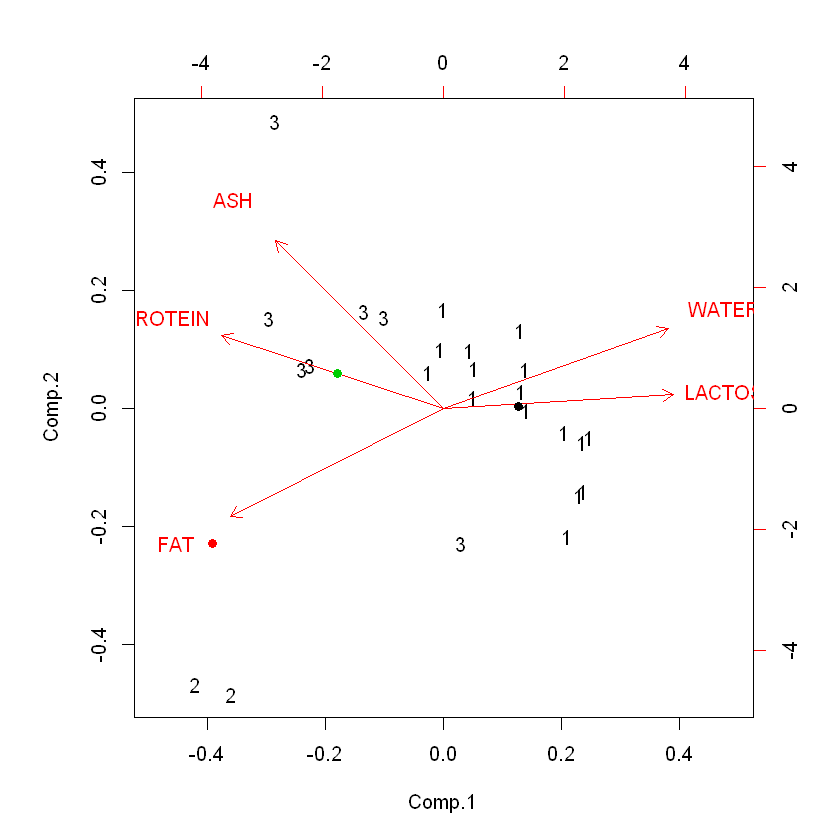

In [4]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


**Se formaron tres grupos:** 
    - Grupo 1 con mayor cantidad de grasa
    - Grupo 2 con mayor cantidad de agua
    - Grupo 3 con mayor cantidad de minerales

Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632
2,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003


K-means clustering with 2 clusters of sizes 8, 17

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 62.66250 9.700000 22.675000 2.300000 1.2762500
2 85.48824 4.570588  4.488235 4.994118 0.6688235

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          2          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          1          1 

Within cluster sum of squares by cluster:
[1] 1664.9235  521.8994
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

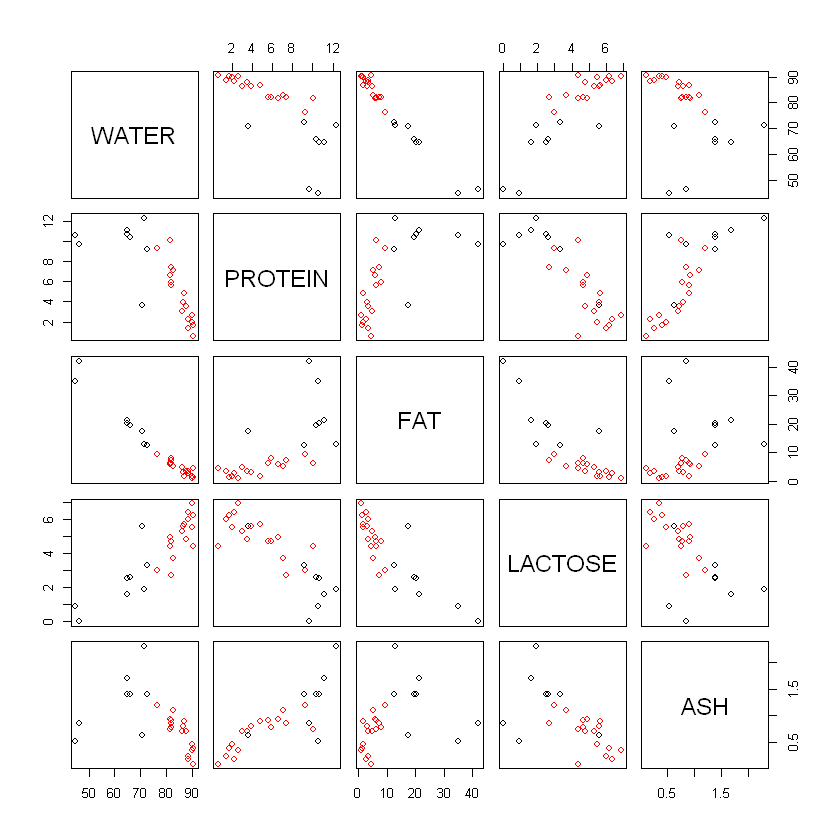

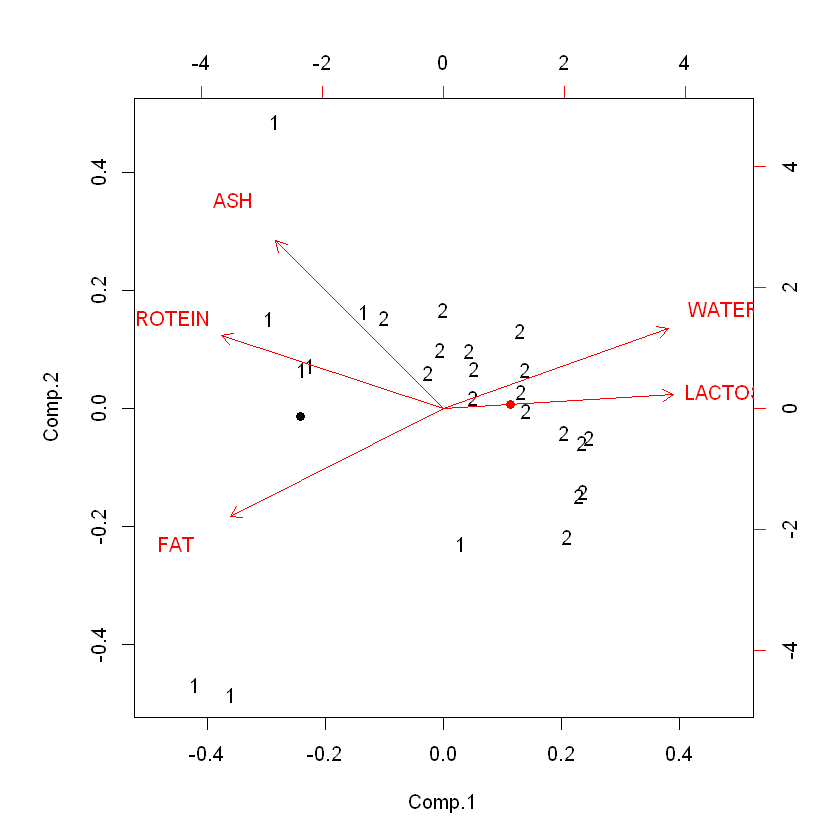

In [5]:
#ingresar valor de k0 
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:4,pch=19)


**Para k=2 se forman dos grupos, donde:**
- Grupo 1 mayor cantidad de grasa, proteina y minerales
- Grupo 2 mayor cantidad de agua y lactosa

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286
2,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768
3,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595
4,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957


K-means clustering with 4 clusters of sizes 10, 6, 7, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 88.50000  2.570000  2.80000 5.680000 0.4850000
2 68.33333  9.550000 17.41667 2.916667 1.4716667
3 81.18571  7.428571  6.90000 4.014286 0.9314286
4 45.65000 10.150000 38.45000 0.450000 0.6900000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          1          1          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          3          3          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          4          4 

Within cluster sum of squares by cluster:
[1]  59.41225 191.74708  63.53491  27.19120
 (between_SS / tot

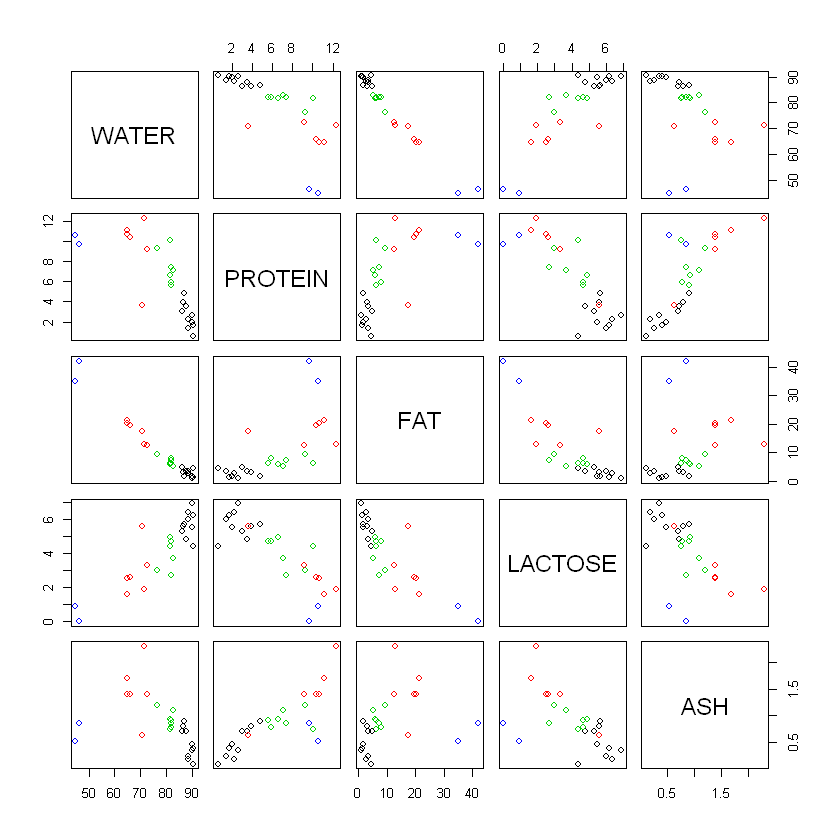

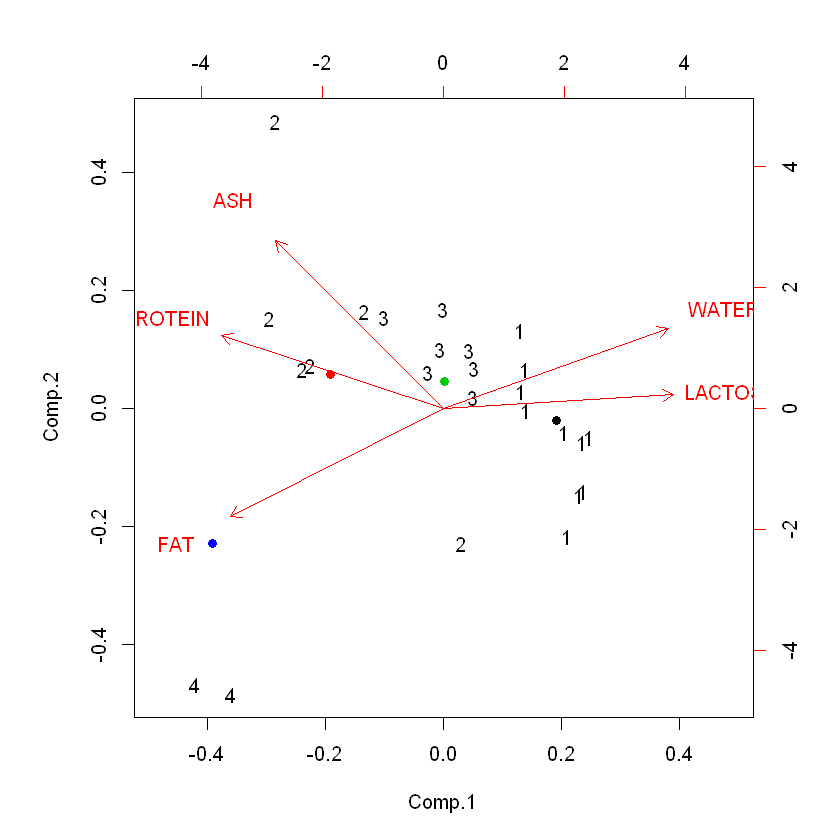

In [6]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:4,pch=19)

**Para k=4 se forma cuatro grupos, donde:**
- Grupo 1 tienen alta cantidad de agua
- Grupo 2 tienen mayor cantidad de minerales y alta cantidad de proteina
- Grupo 3 tienen mayor cantidad de proteina y grasa
- Grupo 4 tienen mayor cantidad de agua y lactosa

[1] "Mejor k"
[1] 4


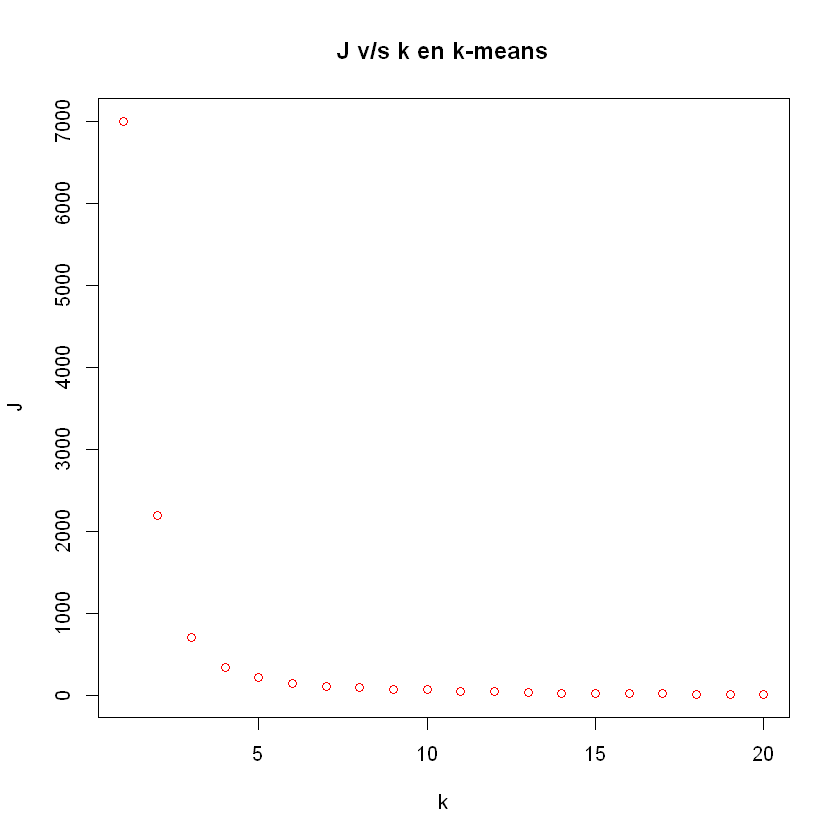

In [130]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20
pend<-19 #pendientes
p<-0
ka<-0
bestk<-0


for (k in 1:fin_iter){
    cl<-kmeans(datos,k,iter.max=1000,nstart=10)
    J[k]<-cl$tot.withinss
    #calcula la pendiente de dos puntos y la guarda en pend
    if(k>1){
        p<-(J[k-1]-J[k])/(k-1 - k)
        pend[k-1]<-p
    }
}

#diferencia de pendientes y guarda la mayor diferencia
for (i in 1:19){
    if(i>1){
        temp<-abs(pend[i-1] - pend[i])
        if(temp>ka){
            ka<- temp
            bestk<-i*2
        }
    }
}

print("Mejor k")
print(bestk)

plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.

**El punto donde la pendiente decrezca de manera sustancial será el valor para K y se puede ver que en el punto 4 ocurre**

Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

In [156]:
df = read.csv("DatosUsoFacebook.csv", header = TRUE,sep=";")
summary(df)

       R1              R2              R3              R4       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.000   Median :3.000   Median :3.000   Median :2.000  
 Mean   :2.556   Mean   :2.604   Mean   :2.519   Mean   :2.262  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R5              R6              R7              R8       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :2.000   Median :3.000  
 Mean   :1.348   Mean   :1.882   Mean   :2.374   Mean   :2.642  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :3.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R9             R10             R11             R12       
 Min.   :1.000   Min.   :

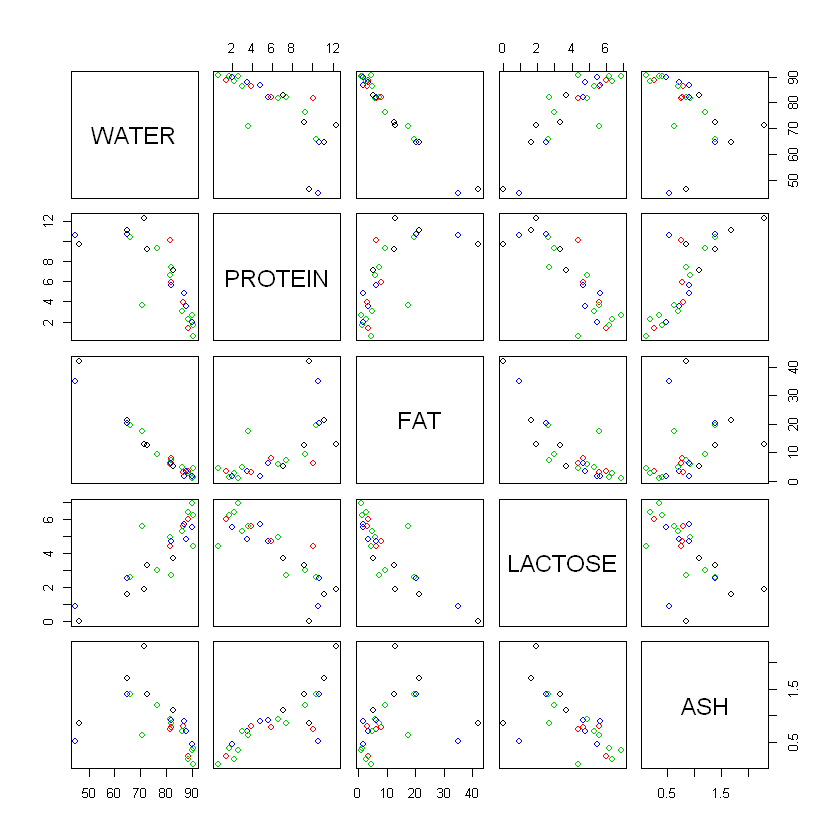

In [163]:
#ingresar valor de k0 
k0=4
cl<-kmeans(df,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
1,-0.9262562,-0.4079829,-0.76529173,0.2620118,0.01172939,0.01517904,-0.09847078,-0.01151460,-0.07260470,0.19262420,-0.08503539,0.12237023,-0.035909691,-0.03173519,0.04762267,0.02253543
2,-0.6806524,0.7214326,0.89033323,-0.4738746,0.13188445,0.22450509,0.17710495,-0.06281133,-0.05334961,-0.15559670,0.06512680,-0.17119663,0.050037156,0.01114587,-0.04989018,-0.09162176
3,1.9640145,-0.2118611,0.09076837,0.1471974,-0.15485951,-0.25717353,-0.05427727,0.08172977,0.15394591,-0.09508331,0.04573208,0.01589104,-0.004451599,0.03094443,-0.01146267,0.06629891


K-means clustering with 3 clusters of sizes 74, 58, 55

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.108108 2.324324 2.364865 2.337838 1.270270 2.243243 2.337838 2.459459
2 2.827586 2.672414 2.241379 2.120690 1.172414 1.603448 2.103448 2.568966
3 2.872727 2.909091 3.018182 2.309091 1.636364 1.690909 2.709091 2.963636
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.216216 1.905405 3.594595 1.567568 3.027027 1.283784 1.351351 1.202703
2 1.310345 2.017241 3.362069 1.431034 1.500000 1.137931 1.534483 1.155172
3 1.690909 1.963636 2.781818 2.309091 2.745455 1.600000 2.400000 1.672727

Clustering vector:
  [1] 1 2 1 1 1 1 1 1 1 1 1 2 1 3 3 2 1 1 3 3 3 2 3 3 2 2 1 1 2 2 1 3 3 1 1 1 2
 [38] 1 1 1 1 2 3 1 2 2 1 2 1 1 2 1 1 3 3 2 1 3 3 3 2 3 2 2 1 3 2 3 3 3 1 2 2 3
 [75] 2 2 1 2 3 1 2 2 3 3 3 1 1 2 1 3 2 3 2 1 3 1 1 1 1 2 3 1 1 2 1 2 1 1 2 1 1
[112] 3 1 3 1 1 3 2 2 2 1 2 2 2 2 2 2 3 1 1 3 1 3 1 3 3 3 3 1 1 2 2 3 3 1 2 3

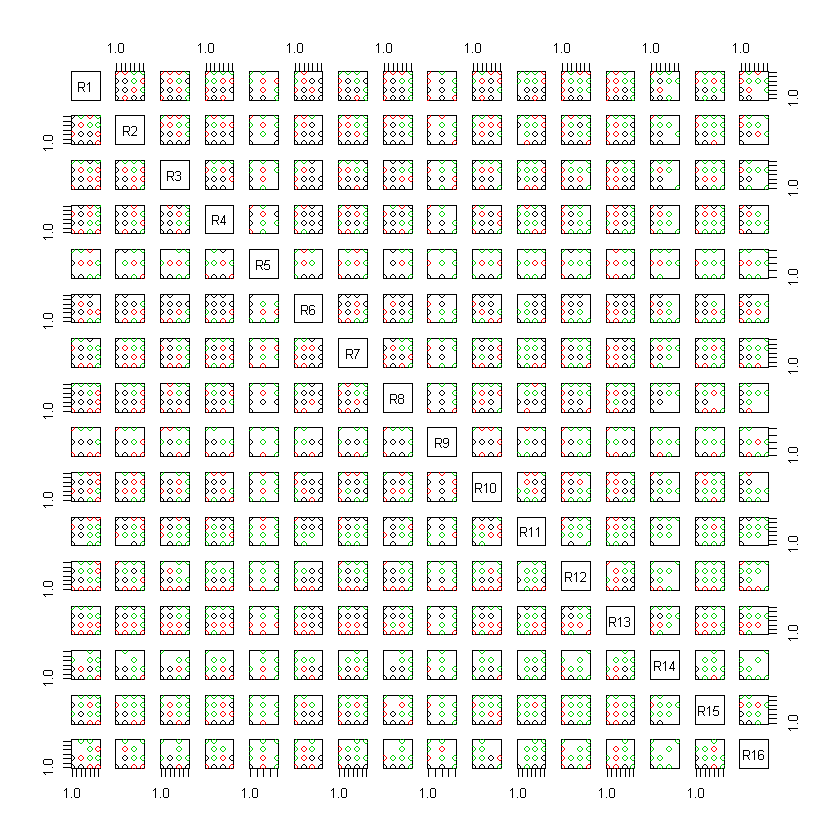

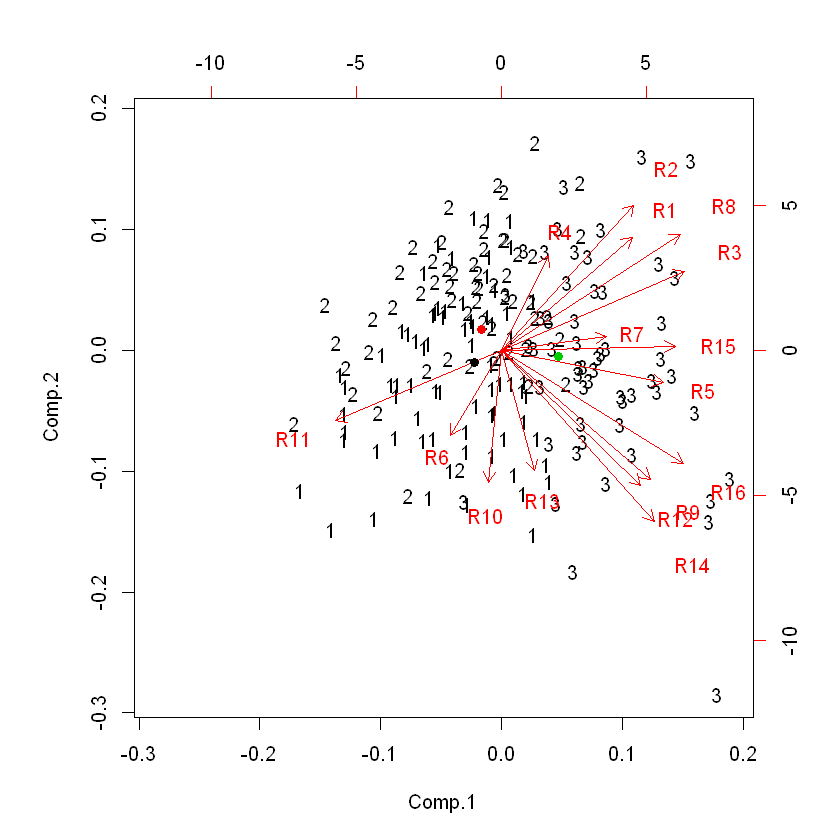

In [188]:
#ingresar valor de k0 
k0=3
cl<-kmeans(df,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(df,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(df, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:4,pch=19)

Warning message:
"did not converge in 1000 iterations"
Warning message:
"did not converge in 1000 iterations"
Warning message:
"did not converge in 1000 iterations"
Warning message:
"did not converge in 1000 iterations"


[1] "Mejor k"
[1] 4


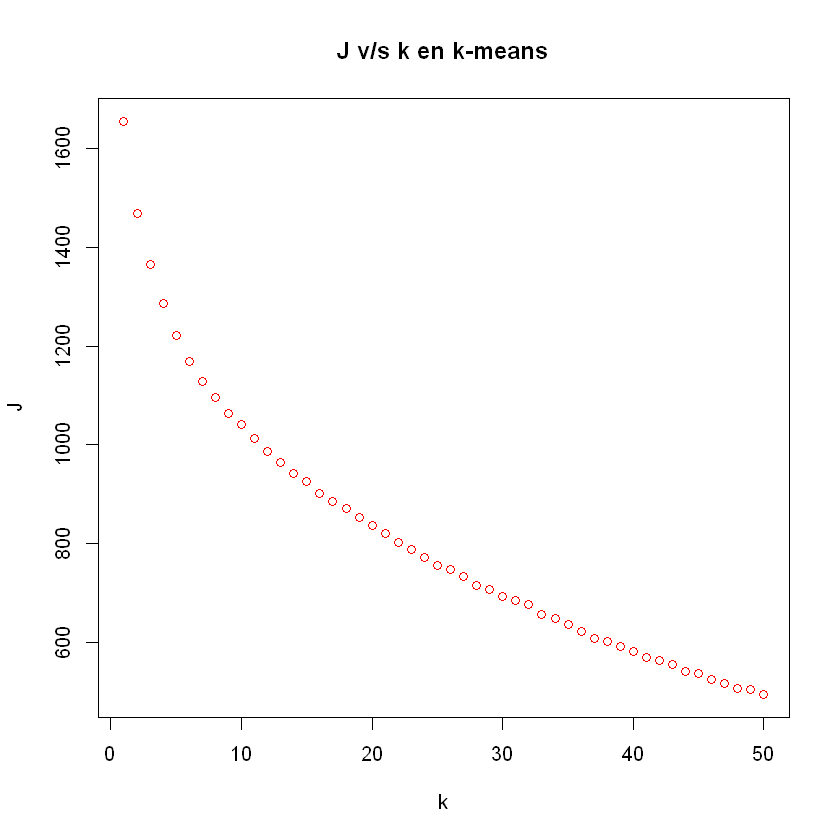

In [185]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-50
pend<-49 #pendientes
ka<-0
bestk1<-0


for (k in 1:fin_iter){
    cl<-kmeans(df,k,iter.max=1000,nstart=10)
    J[k]<-cl$tot.withinss
    #calcula la pendiente de dos puntos y la guarda en pend
    if(k!=1){
        pend[k-1]<-(J[k-1]-J[k])
    }
}

#diferencia de pendientes y guarda la mayor diferencia
for (i in 1:(fin_iter-1)){
    if(i!=1){
        temp<-abs(pend[i-1] - pend[i])
        if(temp>ka){
            ka<- temp
            bestk1<-i*2
        }
    }
}

print("Mejor k")
print(bestk1)

plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 